# Energy consumption

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import helpers as h
from run_power_consumption import masked_ascon_traces, ascon_traces, aes_gcm_traces, none_traces, get_intervals
from matplotlib.ticker import MultipleLocator

In [ ]:
method = "ASCON"

encryption_methods = {
    "NONE": (none_traces, "none1-11"),
    "AES-GCM": (aes_gcm_traces, "aes-gcm1-12"),
    "ASCON": (ascon_traces, "ascon1-6:8-12"),
    "Masked ASCON": (masked_ascon_traces, "masked-ascon2:7-9:12")
}


fs = 4000

In [3]:
# ASCON
path = os.path.join(".." ,"results", "energy_consumption" ,encryption_methods[method][1], "Main power - Arc.csv")
orig_df = h.read_data(path)

In [4]:
# path2 = os.path.join("..", "results", "energy_consumption", "masked_ascon1_and_8", "Main energy - Arc.csv")
# df1_8 = h.read_data(path2)


### Separate power traces

In [5]:
dfs = encryption_methods[method][0](orig_df)

In [6]:
smooth_s   = 0.03
thresh = 0.120
min_gap_s = 0.3

segmented = h.fast_segment(df=dfs[11],
                           value_col='Value',
                           fs=fs,
                           target_fs=2000,
                           smooth_s=smooth_s,
                           thresh=thresh,
                           min_gap_s=min_gap_s)
segmented["Timestamp"] = segmented.index / fs
segmented["Value"] = segmented["Value"]*1e3
# h.plot_segmented(segmented, fs=fs, ylim=(100, 230))

In [7]:
# h.plot_segmented(segmented, fs=fs, ylim=(0.1, 0.23))

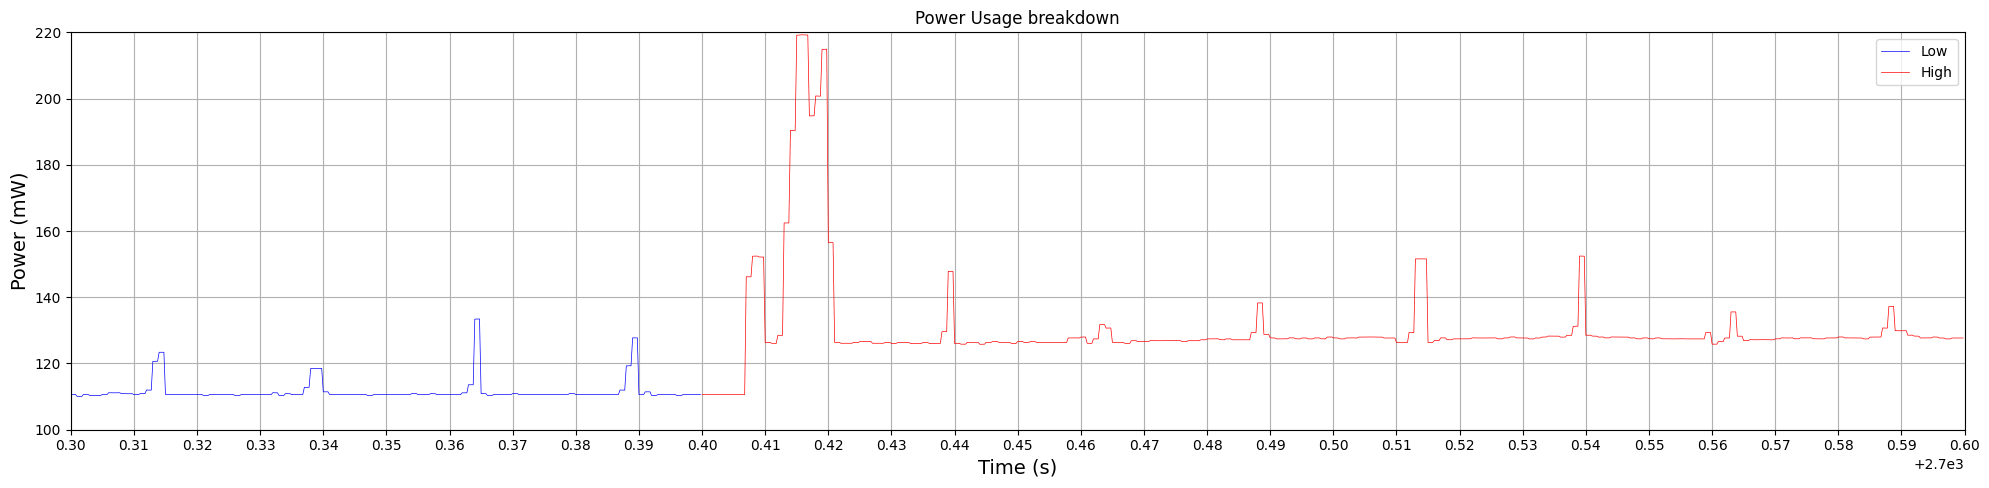

: 

In [ ]:
#plot a 4s segment
start = 0
end = 1
seq = 45

fig, ax = h.plot_segmented(
    segmented,
    fs=fs,
    ylim=(100, 220),
    xlim=(seq * 60 +0.3, seq * 60 + 0.6)
)

ax.set_title("Power Usage breakdown")
ax.xaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

In [ ]:
# def calulate_energy(segmented):
#     segmented["energy[uJ]"] = segmented["Value"]/4000*1e6

# calulate_energy(segmented)
# segmented


In [ ]:
# table = h.summarize_high_intervals(segmented, value_col="energy[uJ]")

In [ ]:
# table

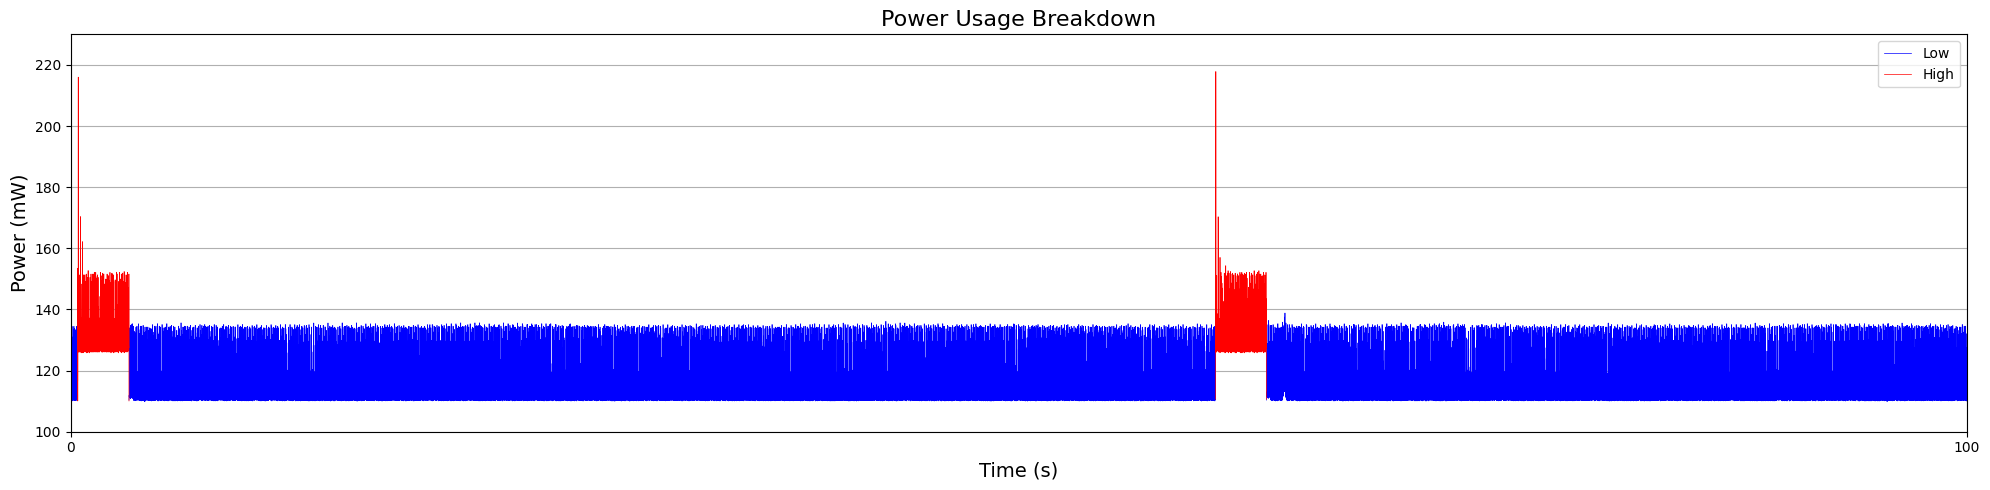

In [ ]:
fig, ax = h.plot_segmented(segmented,
                       fs=fs,
                       ylim=(100, 230),
                       xlim=(0, 100),
                       downsample=4)

ax.xaxis.set_major_locator(MultipleLocator(100))
# plt.show()

In [ ]:
# save the figure
fig.savefig(os.path.join("..", "figures", "power_consumption", "Ascon_scen4.png"),
            dpi=300,
            bbox_inches='tight')